# K_Nearest Neighbors

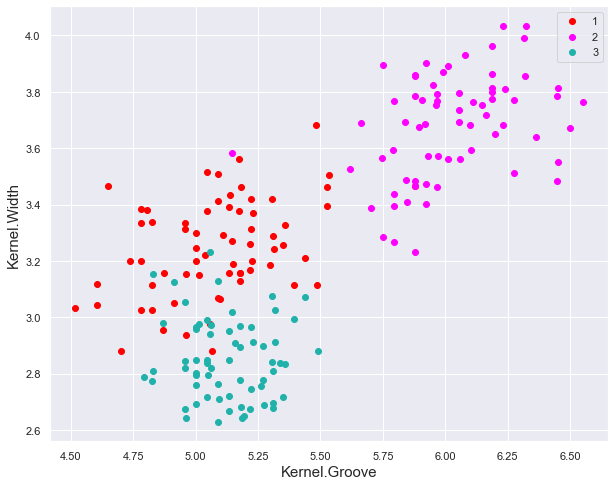

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
#iris = sns.load_dataset("iris")
df = pd.read_csv("seeds.csv")

# Plot the data
seeds = [1,2,3]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for seed, color in zip(seeds, colors):
    temp_df = df[df.Type == seed]
    ax.scatter(temp_df['Kernel.Groove'],
               temp_df['Kernel.Width'],
               c = color,
               label = seed, 
               )
    
ax.set_xlabel("Kernel.Groove", fontsize = 15)
ax.set_ylabel("Kernel.Width", fontsize = 15)
ax.legend()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X = df[["Kernel.Groove",
          "Kernel.Width"]].to_numpy()

y = df["Type"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [4]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 0.920578622389201


In [5]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [6]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([5.136, 3.434]), 1, 0.05215361924162086],
 [array([5.132, 3.393]), 1, 0.08405355435673174],
 [array([5.091, 3.507]), 1, 0.09972963451251543],
 [array([5.175, 3.562]), 1, 0.10012492197250357],
 [array([5.144, 3.582]), 2, 0.12528367810692617]]

In [7]:
# Show the true label 
y_test[-1]

1

Now that we have a function to compute the $k$-nearest neighbors to a point, we can now write a function to predict a target label. However, we should note that KNN can be used for both classification and regression machine learning. This is shown in the code cell below.

In [9]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k
# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 5)


1

In [11]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.07575757575757576

# Choosing the right value for K

In [12]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

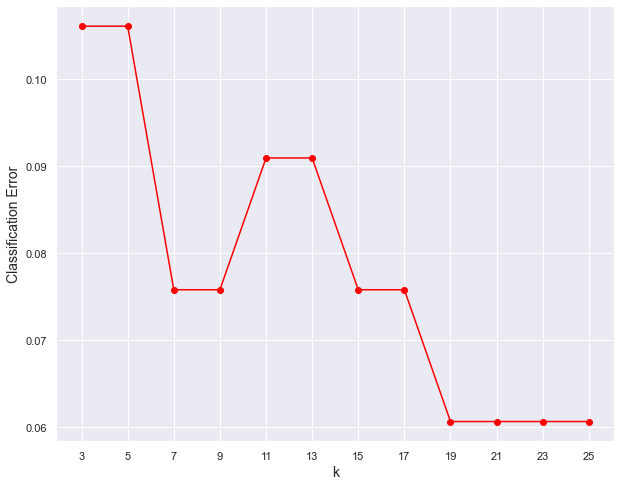

In [13]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

# Scikit-Learn

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme() 


# Grab versicolor and virginica flowers
df = df[df.Type != 1]

# Create feature matrix
X = df[["Kernel.Groove","Kernel.Width"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == 2:
        return 0
    else:
        return 1
    
        
# Create target value array
y = df["Type"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0
 1 1 0 0 1 1 0] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True] 

sum(y_pred == y_test)/len(y_test) = 1.0


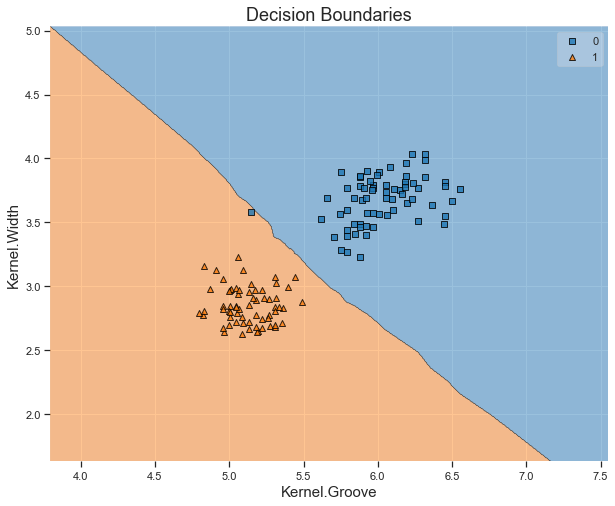

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("Kernel.Groove", fontsize = 15)
plt.ylabel("Kernel.Width", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[20  0]
 [ 0 24]] 



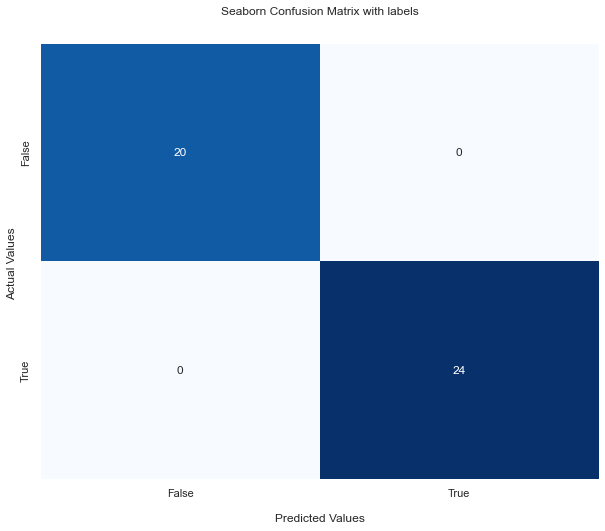

In [15]:
from sklearn.metrics import confusion_matrix

clf = KNeighborsClassifier(n_neighbors = 7)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(f"cf_matrix = {cf_matrix} \n")

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()